<a href="https://colab.research.google.com/github/trevinofernando/Algorithms-for-Machine-Learning/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

##Activation Functions

In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

###Sigmoid

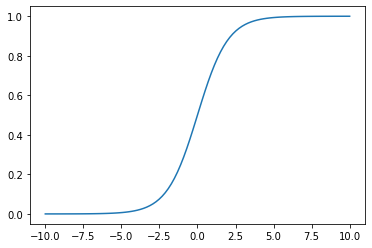

In [9]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10.0, 10.0, 100)
plt.plot(x,sigmoid(x))
plt.show()

####Sigmoid Derivative

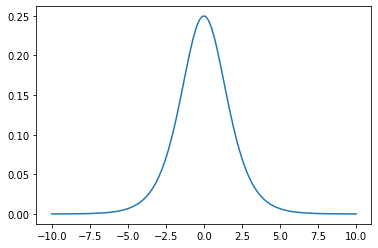

In [10]:
def sigmoidDerivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10.0, 10.0, 100)
plt.plot(x,sigmoidDerivative(x))
plt.show()

###ReLu

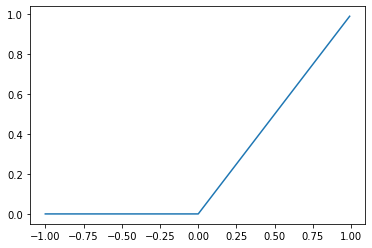

In [11]:
def reLu(x):
  return np.maximum(0, x)

x = np.arange(-1, 1, 0.01)
plt.plot(x,reLu(x))
plt.show()

####ReLu Derivative


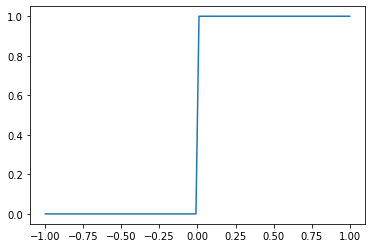

In [12]:
def reLuDerivative(x):
  return np.where(x <= 0, 0, 1)

x = np.linspace(-1.0, 1.0, 100)
plt.plot(x, reLuDerivative(x))
plt.show()

##Binary cross entropy loss function

In [13]:
def CrossEntropy(output, true_label):
    return -np.sum(true_label * np.log2(output)) / output.shape[0]

output = np.array([0.1, 0.5, 0.999])
true_label = np.array([0, 1, 1])

CrossEntropy(output, true_label)

0.33381447228988953

##Create synthetic training data set

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


###Visualize data

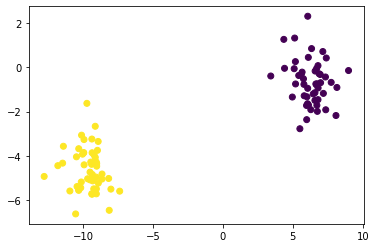

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y)

##Create SImple Neural Network with only Input layer and Output layer

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = keras.Sequential([
    keras.layers.Dense(3, input_dim=2, activation=keras.activations.sigmoid),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


###Train model

In [17]:
# train the model
epochs = 500
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, batch_size=50, epochs=epochs, validation_split=0.33)

Epoch 1/500
2/2 [==============================] - 0s 71ms/step - loss: 0.6373 - accuracy: 1.0000 - val_loss: 0.6385 - val_accuracy: 1.0000
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6357 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 1.0000
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6342 - accuracy: 1.0000 - val_loss: 0.6355 - val_accuracy: 1.0000
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6327 - accuracy: 1.0000 - val_loss: 0.6340 - val_accuracy: 1.0000
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 0.6311 - accuracy: 1.0000 - val_loss: 0.6325 - val_accuracy: 1.0000
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 0.6296 - accuracy: 1.0000 - val_loss: 0.6310 - val_accuracy: 1.0000
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 0.6280 - accuracy: 1.0000 - val_loss: 0.6295 - val_accuracy: 1.0000
Epoch 8/500
2/2 [=======

###Results

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (test_acc*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 1.0000
Accuracy: 100.00


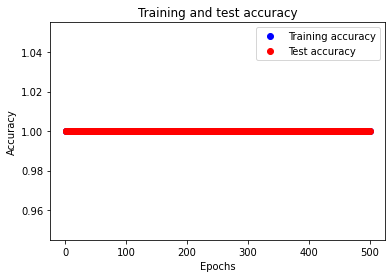

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Adding a single hidden layer and observe results

In [20]:
model = keras.Sequential([
    keras.layers.Dense(3, input_dim=2, activation=keras.activations.relu),
    keras.layers.Dense(2, activation=keras.activations.sigmoid),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


###Train model

In [21]:
X = (X - np.min(X))/np.ptp(X)

# train the model
epochs = 500
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, batch_size=50, epochs=epochs, validation_split=0.33)

Epoch 1/500
2/2 [==============================] - 0s 65ms/step - loss: 0.7120 - accuracy: 0.4925 - val_loss: 0.7051 - val_accuracy: 0.5152
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7114 - accuracy: 0.4925 - val_loss: 0.7047 - val_accuracy: 0.5152
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7110 - accuracy: 0.4925 - val_loss: 0.7042 - val_accuracy: 0.5152
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7104 - accuracy: 0.4925 - val_loss: 0.7038 - val_accuracy: 0.5152
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 0.7099 - accuracy: 0.4925 - val_loss: 0.7034 - val_accuracy: 0.5152
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 0.7094 - accuracy: 0.4925 - val_loss: 0.7030 - val_accuracy: 0.5152
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 0.7090 - accuracy: 0.4925 - val_loss: 0.7026 - val_accuracy: 0.5152
Epoch 8/500
2/2 [======

###Results

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (test_acc*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 1.0000
Accuracy: 100.00


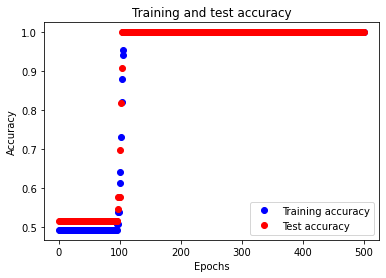

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##Conclusion
Both Neural Network (NN) models were able to reach max accuarcy on the training and test data. But we can see that the second NN took longer too improve (around epoch 100), this might be because of the increase in parameters forcing the NN to need more examples during training to tune all of the parameters.